In [27]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv

Errata.csv
Philippines.data
README.md
time_series_covid19_confirmed_global.csv
time_series_covid19_confirmed_US.csv
time_series_covid19_deaths_global.csv
time_series_covid19_deaths_US.csv
time_series_covid19_recovered_global.csv


In [81]:
!pip show basemap | grep Location

Location: /mnt/40ec525c-34bc-44ef-99c8-53f5524ad88b/miniconda3/lib/python3.7/site-packages


In [93]:
import os
import inspect
print(inspect.getfile(Basemap))

/usr/lib/python2.7/dist-packages/mpl_toolkits/basemap/__init__.pyc


In [86]:
import os.path
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap
print(os.path.abspath('mpl_toolkits.basemap'))

/home/jack/Desktop/COVID-19-Jupyter-Notebooks/mpl_toolkits.basemap


In [94]:
!locate etopo20data.gz

/home/jack/Desktop/state-data/basemap/examples/etopo20data.gz


In [14]:
from mpl_toolkits.basemap import Basemap


In [15]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/

01-22-2020.csv	02-14-2020.csv	03-08-2020.csv	03-31-2020.csv	04-23-2020.csv
01-23-2020.csv	02-15-2020.csv	03-09-2020.csv	04-01-2020.csv	04-24-2020.csv
01-24-2020.csv	02-16-2020.csv	03-10-2020.csv	04-02-2020.csv	04-25-2020.csv
01-25-2020.csv	02-17-2020.csv	03-11-2020.csv	04-03-2020.csv	04-26-2020.csv
01-26-2020.csv	02-18-2020.csv	03-12-2020.csv	04-04-2020.csv	04-27-2020.csv
01-27-2020.csv	02-19-2020.csv	03-13-2020.csv	04-05-2020.csv	04-28-2020.csv
01-28-2020.csv	02-20-2020.csv	03-14-2020.csv	04-06-2020.csv	04-29-2020.csv
01-29-2020.csv	02-21-2020.csv	03-15-2020.csv	04-07-2020.csv	04-30-2020.csv
01-30-2020.csv	02-22-2020.csv	03-16-2020.csv	04-08-2020.csv	05-01-2020.csv
01-31-2020.csv	02-23-2020.csv	03-17-2020.csv	04-09-2020.csv	05-02-2020.csv
02-01-2020.csv	02-24-2020.csv	03-18-2020.csv	04-10-2020.csv	05-03-2020.csv
02-02-2020.csv	02-25-2020.csv	03-19-2020.csv	04-11-2020.csv	05-04-2020.csv
02-03-2020.csv	02-26-2020.csv	03-20-2020.csv	04-12-2020.csv	05-05-2020.csv
02-04-2020.csv	02-27-2020

183
drawing image from arcGIS server... ...finished


{u'contributors': None,
 u'coordinates': None,
 u'created_at': u'Tue Apr 28 21:27:55 +0000 2020',
 u'entities': {u'hashtags': [{u'indices': [0, 9], u'text': u'Virginia'},
   {u'indices': [11, 18], u'text': u'arcGIS'},
   {u'indices': [26, 34], u'text': u'Basemap'},
   {u'indices': [35, 41], u'text': u'COVID'},
   {u'indices': [47, 54], u'text': u'Python'},
   {u'indices': [96, 109], u'text': u'JupyterJones'}],
  u'media': [{u'display_url': u'pic.twitter.com/U23qR8CWCa',
    u'expanded_url': u'https://twitter.com/JackLNorthrup/status/1255247396197597187/photo/1',
    u'id': 1255247392661745664,
    u'id_str': u'1255247392661745664',
    u'indices': [110, 133],
    u'media_url': u'http://pbs.twimg.com/media/EWuI2mDWsAA61Vk.png',
    u'media_url_https': u'https://pbs.twimg.com/media/EWuI2mDWsAA61Vk.png',
    u'sizes': {u'large': {u'h': 549, u'resize': u'fit', u'w': 720},
     u'medium': {u'h': 549, u'resize': u'fit', u'w': 720},
     u'small': {u'h': 519, u'resize': u'fit', u'w': 680},
  

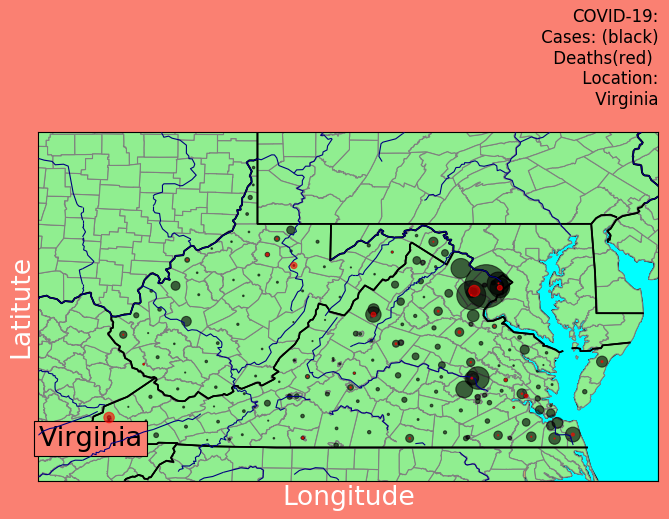

In [69]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
#prevents a warning from using Python3 instaead of Python2
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
# Make the figure
#fig = plt.figure()
#ax = fig.add_subplot(111)

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,50)
    return TX[x]
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-27-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)


fig = plt.figure(num=None, figsize=(10,8), dpi=80, facecolor='salmon')


urcrnrlat=max(LT)+.5
llcrnrlat=min(LT)-.5
urcrnrlon=max(LG)+.8
llcrnrlon=min(LG)-.5
lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2

# create the map object, m
m = Basemap(resolution='i', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full

# Draw some map elements on the map
m.drawmapboundary(fill_color='aqua')
m.fillcontinents(color='#ddaa66',lake_color='aqua')
m.drawcoastlines()
m.drawrivers(linewidth=1.0,color='navy',zorder=8)
m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor='lightgreen', ax=None, zorder=2, drawbounds=True)
m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon,llcrnrlat+.5, search, color='black', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
m.arcgisimage(service=maps[8], xpixels=1000, verbose=False)
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.5)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd))
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)



#plt.scatter(x, y,  s=s, color="black", zorder=3, alpha=0.6)
#plt.scatter(x, y,  s=sd, color="red", zorder=6, alpha=0.6)
#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)

# Add plot title and other plot elements the normal way
filename0 = "BaseMap/"+search+"arcGIS__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (15, 30), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 16)
    i2 = draw_blurred_back(i2, (15, 65), "Plot Using ArcGIS Basemap - "+search, font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((15, 5), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "#"+search+"  #arcGIS server #Basemap #COVID-19 - #Python  Plot data using "+TXT+" #JupyterJones" 

PATH = "images/TEMP_POST.png"
photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])

60
drawing image from arcGIS server... http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=-109.560253,36.492426,-101.541524,41.503444&bboxSR=4326&imageSR=4326&size=3500,2187&dpi=500&format=png32&f=image
...finished


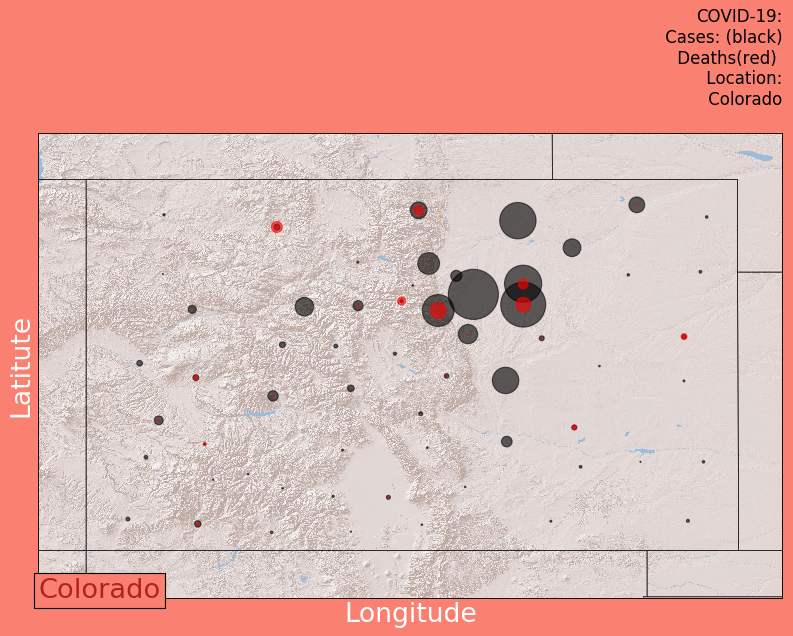

In [27]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image,ImageFont,ImageDraw,ImageFilter,ImageChops
from random import randint
from mpl_toolkits.basemap import Basemap
from US_State_Bounding_Boxes import GetCOOR # get coordinates for state(box)
#prevents a warning from using Python3 instaead of Python2
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.insert(1, "/home/jack/hidden")
import Key
import twython
from twython import Twython
# Make the figure
#fig = plt.figure()
#ax = fig.add_subplot(111)

# Easiest way to make a basemap is to use the cylidrical projection and 
# define the bottom left lat/lon and top right lat/lon corners

def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,49)
    return TX[x]
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2020.csv"
#LASTFILE="csse_covid_19_data/csse_covid_19_daily_reports/03-30-2020.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
LATd=[]
LONGd=[]
STATES=[]
cases=[]
deaths =[]
longitude = ""
search = RndState()
#search = "Florida"
for line in DataIn:
    line=line.replace("\n","")
    line = line.lstrip(",")
    line = line.split(",")
    if search in line[2] and "-" in (line[6]):
        text=line[2],line[1],line[3],line[4],line[5],line[6],line[7],line[8],line[9],line[10]
        STATES.append(text)
        LAT.append(line[5])
        LONG.append(line[6])
        if int(line[8])>0:
            LATd.append(line[5])
            LONGd.append(line[6])        
        cases.append(line[7])
        deaths.append(line[8])
        longitude = longitude+line[6]+","
print(len(STATES))        
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
LTd = np.array(LATd,dtype=np.float)
LGd = np.array(LONGd,dtype=np.float)

fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='salmon')
coor= GetCOOR(search)
urcrnrlat = coor[0]+.5
llcrnrlat = coor[1]-.5
urcrnrlon = coor[2]+.5
llcrnrlon = coor[3]-.5

lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2
# create the map object, m
m = Basemap(resolution='h', projection='cyl', \
    llcrnrlon=llcrnrlon, llcrnrlat=llcrnrlat, urcrnrlon=urcrnrlon, urcrnrlat=urcrnrlat)

# Note: You can define the resolution of the map you just created. Higher 
# resolutions take longer to create.
#    'c' - crude
#    'l' - low
#    'i' - intermediate
#    'h' - high
#    'f' - full


# Draw some map elements on the map
#m.drawmapboundary(fill_color='aqua')
#m.fillcontinents(color='#ddaa66',lake_color='aqua')
#m.drawcoastlines()
#m.drawrivers(linewidth=1.0,color='navy',zorder=8)
#m.drawcounties(linewidth=1.0, linestyle='solid', color='gray', antialiased=1, facecolor=None, ax=None, zorder=2, drawbounds=True)
#m.drawstates(linewidth=1.5, linestyle='solid', color='black', antialiased=1,zorder=2, )
plt.text(llcrnrlon,llcrnrlat, search, color='firebrick', fontsize=24.5, zorder=6,bbox=dict(facecolor='salmon'))

# Drawing ArcGIS Basemap (only works with cylc projections??)
# Examples of what each map looks like can be found here:
# http://kbkb-wx-python.blogspot.com/2016/04/python-basemap-background-image-from.html
maps = ['ESRI_Imagery_World_2D',    # 0
        'ESRI_StreetMap_World_2D',  # 1
        'NatGeo_World_Map',         # 2
        'NGS_Topo_US_2D',           # 3
        'Ocean_Basemap',            # 4
        'USA_Topo_Maps',            # 5
        'World_Imagery',            # 6
        'World_Physical_Map',       # 7
        'World_Shaded_Relief',      # 8
        'World_Street_Map',         # 9
        'World_Terrain_Base',       # 10
        'World_Topo_Map'            # 11
        ]
print ("drawing image from arcGIS server..."),
#m.arcgisimage(service=maps[9], xpixels=1000, verbose=False)
# Rank Styles: 0 Not good for plots
#              1 Nice Map
#              2 Nice Map 
MapStyle= 8
m.arcgisimage(service=maps[MapStyle], xpixels = 3500, dpi=500, verbose= True)
m.drawstates()
print ("...finished")

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.5)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

Sd=0
Sized=[]
for xd in deaths:
    Sd=0+(float(xd))
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)
#print(Sized)
plt.title("COVID-19:\n Cases: (black)\n Deaths(red) \n Location:\n "+search+"\n", fontsize=15, loc='right')
#plt.text(max(LG-1.2),max(LT), search, color='white', fontsize=24)
#x, y = m(lons, lats)  # transform coordinates
x, y = m(LGd, LTd)
xx,yy = m(LG, LT)
plt.xlabel('Longitude',color="white", fontsize=24)
plt.ylabel('Latitute',color="white", fontsize=24)

m.scatter(xx, yy, s=s, color='black', zorder=5, alpha=0.6)
m.scatter(x, y, s=sd, color='r', zorder=10,  alpha=0.6)

#plt.text(urcrnrlon,urcrnrlat, search, color='white', fontsize=24)
plt.savefig("BaseMap/"+search+"arcGIS__.png", dpi=120, facecolor='salmon', edgecolor='b',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches="tight", pad_inches=0.2,
        frameon=None, metadata=None)
#plt.show()
# Plot a scatter point at WBB on the map object
#lon = -111.85
#lat = 40.77
#m.scatter(lon,lat,c='r',s=150)

filename0 = "BaseMap/"+search+"arcGIS__.png"


def draw_blurred_back(img, position, text, font, col, halo_col):
    halo = Image.new('RGBA', img.size, (0, 0, 0, 0))
    ImageDraw.Draw(halo).text(position, text, font = font, fill = halo_col)
    blurred_halo = halo.filter(ImageFilter.BLUR)
    ImageDraw.Draw(blurred_halo).text(position, text, font = font, fill = col)
    return Image.composite(img, blurred_halo, ImageChops.invert(blurred_halo))

if __name__ == '__main__':
    
    basewidth = 720
    inp = Image.open(filename0)
    wpercent = (basewidth / float(inp.size[0]))
    hsize = int((float(inp.size[1]) * float(wpercent)))
    inp = inp.resize((basewidth, hsize), Image.ANTIALIAS)
    #img.save(resized_image.jpg')
    
    #inp = inp.resize((640,640), Image.ANTIALIAS)
    font = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 30)
    text_title = (255, 255,230) # bright green
    blur_title = (0, 0, 0)   # black

    i2 = draw_blurred_back(inp, (15, 35), "Plotting COVID-19 Data", font, text_title, blur_title)
    font0 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    font1 = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 14)
    font2 = ImageFont.truetype("/home/jack/fonts/PatrickHand-Regular.ttf", 18)
    i2 = draw_blurred_back(i2, (15, 70), "Plot Using ArcGIS Basemap Style "+str(MapStyle)+" - "+search, font0, text_title, blur_title)
    TXT="https://github.com/JupyterJones/COVID-19-Jupyter-Notebooks"
    draw = ImageDraw.Draw(i2) 
    draw.text((15, 10), TXT, font = font2, align ="left",fill="black")
    #i2 = draw(i2, (15, 65),TXT, font1)    
    
    #txt = Image.new('RGBA', i.size, (255,255,255,0))

    # get a font
    fnt = ImageFont.truetype("/home/jack/fonts/Exo-Black.ttf", 20)
    # get a drawing context
    signature_ = "@jacklnorthrup" 
    #get length in pixel of signature_
    sizeS,ln = fnt.getsize(signature_)
    #add 15 pixels to right border
    pt = sizeS+25
    width, height = inp.size
    #marginx starting point of signature_
    marginx = pt
    #bottom margin
    marginy = 30
    x = width - marginx
    y = height - marginy
    

    text_sig = (255, 255,230) # bright green
    blur_sig = (0, 0, 0)   # black
    txt=draw_blurred_back(i2,(x,y), signature_, fnt, text_sig, blur_sig)
    out = Image.alpha_composite(i2, txt)
    out.save("images/TEMP_POST.png")
    out.save("images/"+str(MapStyle)+"_POST.png")

CONSUMER_KEY = Key.twiter()[0]
CONSUMER_SECRET = Key.twiter()[1]
ACCESS_KEY = Key.twiter()[2]
ACCESS_SECRET = Key.twiter()[3]
twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET, ACCESS_KEY, ACCESS_SECRET)

STR = "Plot data using MapStyle= "+str(MapStyle)+" "+TXT+" #JupyterJones #"+search+"  #arcGIS server #Basemap #COVID-19 - #Python" 

PATH = "images/TEMP_POST.png"
photo = open(PATH,'rb')
#response = twitter.upload_media(media=photo)
#twitter.update_status(status=STR, media_ids=[response['media_id']])

(720, 569)


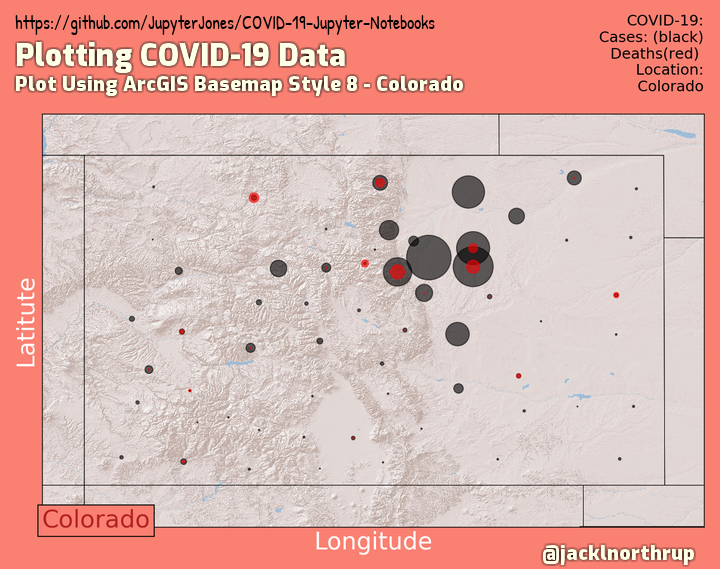

In [28]:
from PIL import Image
PATH = "images/TEMP_POST.png"
IM = Image.open(PATH)
print(IM.size)
IM

# Viewing Different Map Styles

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-104.557698,41.979635,-95.936589,46.44545&bboxSR=4326&imageSR=4326&size=3500,1813&dpi=500&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_StreetMap_World_2D/MapServer/export?bbox=-104.557698,41.979635,-95.936589,46.44545&bboxSR=4326&imageSR=4326&size=3500,1813&dpi=500&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-104.557698,41.979635,-95.936589,46.44545&bboxSR=4326&imageSR=4326&size=3500,1813&dpi=500&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/NGS_Topo_US_2D/MapServer/export?bbox=-104.557698,41.979635,-95.936589,46.44545&bboxSR=4326&imageSR=4326&size=3500,1813&dpi=500&format=png32&f=image
http://server.arcgisonline.com/ArcGIS/rest/services/USA_Topo_Maps/MapServer/export?bbox=-104.557698,41.979635,-95.936589,46.44545&bboxSR=4326&imageSR=4326&size=3500,1813&dpi=500&form

<Figure size 960x800 with 0 Axes>

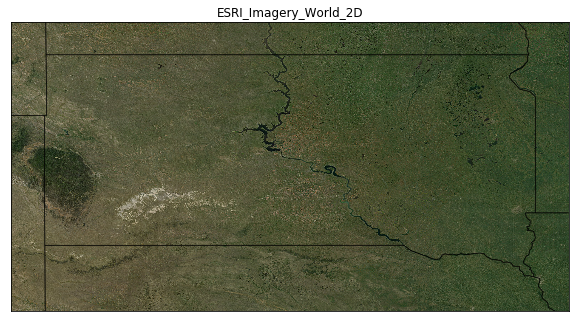

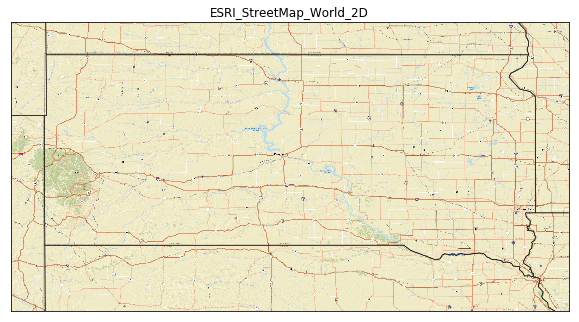

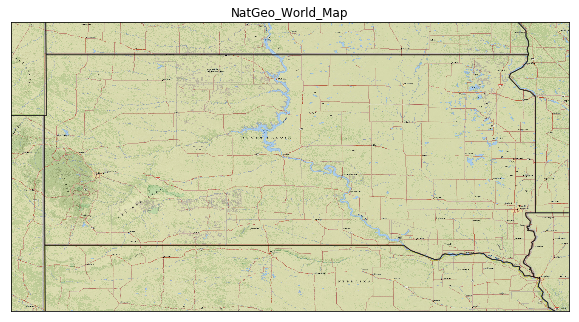

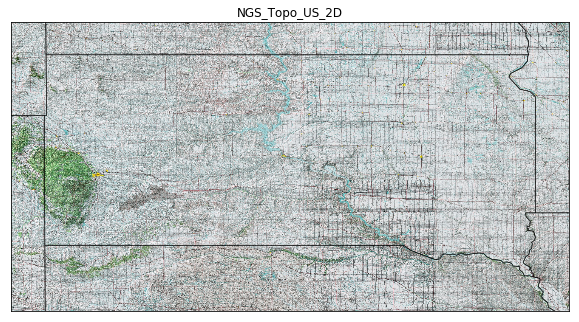

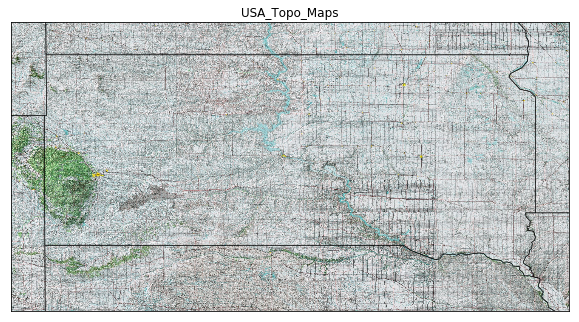

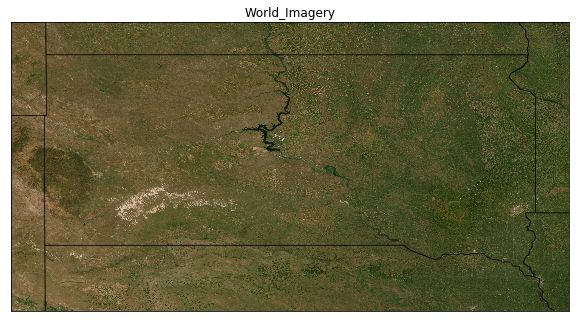

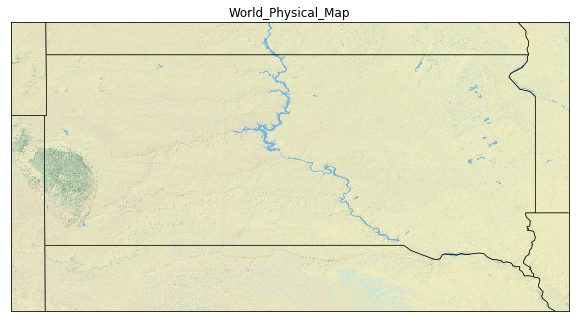

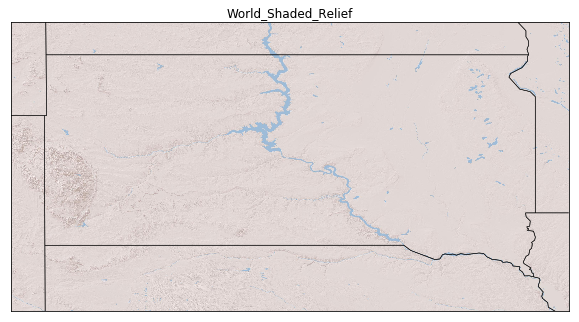

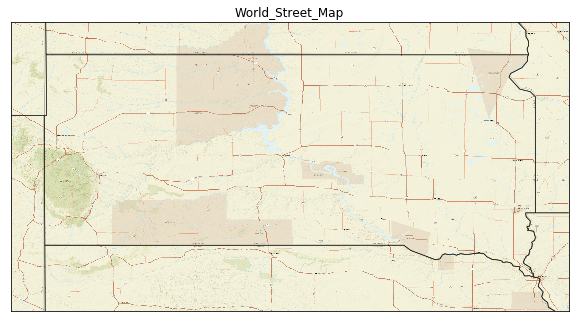

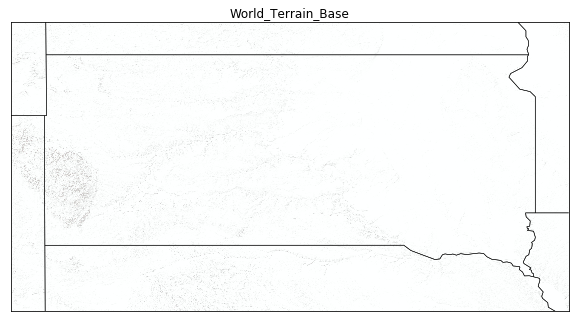

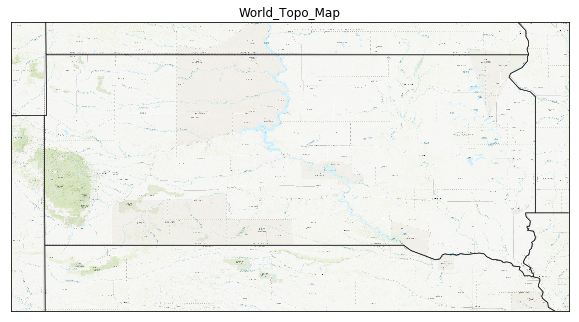

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from random import randint
from US_State_Bounding_Boxes import GetCOOR
def RndState():
    TX=["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
    x=randint(1,50)
    return TX[x]


search = RndState()
fig = plt.figure(num=None, figsize=(12,10), dpi=80, facecolor='salmon')
coor= GetCOOR(search)
urcrnrlat = coor[0]+.5
llcrnrlat = coor[1]-.5
urcrnrlon = coor[2]+.5
llcrnrlon = coor[3]-.5

lat_0 = (urcrnrlat+llcrnrlat)/2
lon_0 =(urcrnrlon+llcrnrlon)/2



## Map in cylindrical projection (data points may apear skewed)
m = Basemap(resolution='i',projection='cyl',\
            llcrnrlon=llcrnrlon,llcrnrlat=llcrnrlat,\
            urcrnrlon=urcrnrlon,urcrnrlat=urcrnrlat,)


map_list = [
'ESRI_Imagery_World_2D',    # 0
'ESRI_StreetMap_World_2D',  # 1
'NatGeo_World_Map',         # 2
'NGS_Topo_US_2D',           # 3
#'Ocean_Basemap',            # 4
'USA_Topo_Maps',            # 5
'World_Imagery',            # 6
'World_Physical_Map',       # 7     Still blurry
'World_Shaded_Relief',      # 8
'World_Street_Map',         # 9
'World_Terrain_Base',       # 10
'World_Topo_Map'            # 11
]

for maps in map_list: 
    plt.figure(figsize=[10,20])    
    ## Instead of using WRF terrain fields you can get a high resolution image from ESRI
    m.arcgisimage(service=maps, xpixels = 3500, dpi=500, verbose= True)
    m.drawstates()
    plt.title(maps)
    
    plt.savefig('00'+maps, dpi=120, bbox_inches="tight")

In [71]:
!pip install functions_domains_models

ERROR: Could not find a version that satisfies the requirement functions_domains_models (from versions: none)
ERROR: No matching distribution found for functions_domains_models


In [ ]:
m.arcgisimage(service=maps, xpixels = 3500, dpi=500, verbose= True)